In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.stats import probplot


In [27]:
df = pd.read_csv('data/train.csv')

## Exploratory Data Analysis

Split validation set out before doing EDA

In [5]:
df_test, df_val = train_test_split(df, random_state=0, test_size=0.2)

In [6]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
618,619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
870,871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,109500
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
817,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,271000
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
40,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000
959,960,160,FV,24.0,2572,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,155000
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
1389,1390,50,RM,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,131000


In [6]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,...,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349,180808.898973
std,421.609683,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,...,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971,78499.911304
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,749.500000,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1108.750000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Lots of text fields that will need to be encoded (maybe try catboost)
* Lots of missing values, especially in categoricals
* Some in numerical values that I should try to impute
* Medium number of features and not that much data (should try some simple models)
* May want to bucket some of the numerical features like year built'
* MSSubClass is actually a categorical


Check for missing values

In [7]:
df_test.describe().transpose().loc[lambda x: x['count'] != 1460]

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,738.685788,421.609683,1.0,373.75,749.5,1108.75,1460.0
MSSubClass,1168.0,56.605308,42.172322,20.0,20.00,50.0,70.00,190.0
LotFrontage,956.0,69.614017,22.946069,21.0,59.00,69.0,80.00,313.0
LotArea,1168.0,10589.672945,10704.180793,1300.0,7589.50,9512.5,11601.50,215245.0
OverallQual,1168.0,6.086473,1.367472,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.572774,1.116908,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.890411,30.407486,1872.0,1953.75,1972.0,2000.00,2010.0
YearRemodAdd,1168.0,1984.692637,20.684612,1950.0,1966.00,1993.0,2004.00,2010.0
MasVnrArea,1162.0,103.481067,182.676225,0.0,0.00,0.0,167.75,1600.0
BsmtFinSF1,1168.0,439.890411,435.106803,0.0,0.00,379.5,716.00,2260.0


* After getting dummy variables there are 304 features which is likely too many for OLS
* Will need to use some kind of feature selection or regularization
* Still a few missing values to impute
* Try a simple pipeline with regression, random forest, gboosting

### Look at Saleprice

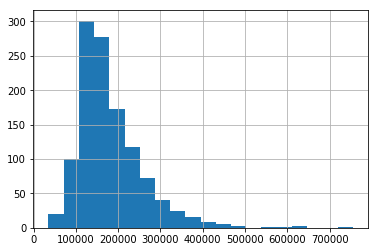

In [8]:
df_test.SalePrice.hist(bins=20)

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([ 34900,  35311,  37900, ..., 611657, 625000, 755000])),
 (73821.34327147194, 180808.89897260276, 0.938521848563778))

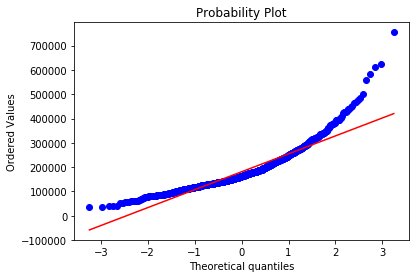

In [9]:
probplot(df_test.SalePrice, plot=plt)

* Not normal
* Definite skewness
* All values seem reasonable, no extreme outliers


### Look at numerical features

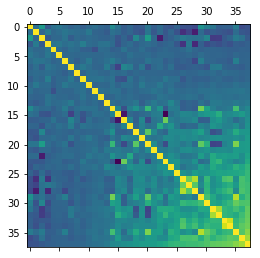

In [10]:
plt.matshow(df_test.corr().sort_values('SalePrice', axis=1).sort_values('SalePrice', axis=0))

In [11]:
df_test.corr().sort_values('SalePrice', axis=1).sort_values('SalePrice', axis=0).iloc[24:,24:]

,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
Fireplaces,1.000000,0.246034,0.058783,0.127328,0.152379,0.318257,0.239075,0.404451,0.321543,0.275052,0.321332,0.447918,0.380523,0.470320
MasVnrArea,0.246034,1.000000,0.254034,0.190797,0.317524,0.259534,0.272867,0.335797,0.364254,0.355533,0.370311,0.377194,0.413465,0.493482
GarageYrBlt,0.058783,0.254034,1.000000,0.649385,0.822975,0.150748,0.490256,0.226959,0.321502,0.556867,0.585468,0.236417,0.558957,0.494154
YearRemodAdd,0.127328,0.190797,0.649385,1.000000,0.599605,0.192446,0.455150,0.236224,0.297686,0.387651,0.442217,0.292263,0.551088,0.517822
YearBuilt,0.152379,0.317524,0.822975,0.599605,1.000000,0.087199,0.475083,0.266841,0.391412,0.466313,0.530023,0.186589,0.571103,0.521242
TotRmsAbvGrd,0.318257,0.259534,0.150748,0.192446,0.087199,1.000000,0.546619,0.397916,0.262161,0.348405,0.379615,0.829416,0.431257,0.542658
FullBath,0.239075,0.272867,0.490256,0.455150,0.475083,0.546619,1.000000,0.379186,0.333643,0.422629,0.490228,0.640448,0.569385,0.578134
1stFlrSF,0.404451,0.335797,0.226959,0.236224,0.266841,0.397916,0.379186,1.000000,0.795440,0.486334,0.454591,0.537653,0.458779,0.620740
TotalBsmtSF,0.321543,0.364254,0.321502,0.297686,0.391412,0.262161,0.333643,0.795440,1.000000,0.480631,0.455507,0.405195,0.525707,0.635535
GarageArea,0.275052,0.355533,0.556867,0.387651,0.466313,0.348405,0.422629,0.486334,0.480631,1.000000,0.887174,0.479759,0.563745,0.646603


* Makes sense that overall quality and living area are highly correlated with price
* Several pairs of variables that are correlated (Garage, floor area, year built)

#### Impact of Garage

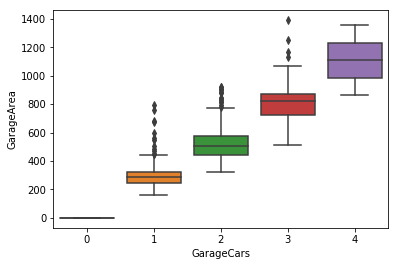

In [12]:
sb.boxplot(df_test.GarageCars, df_test.GarageArea)

Clear correlation but size can vary a lot for each number of cars

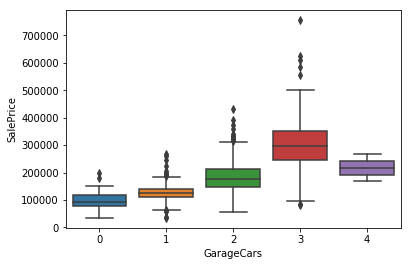

In [13]:
sb.boxplot(df_test.GarageCars, df.SalePrice)

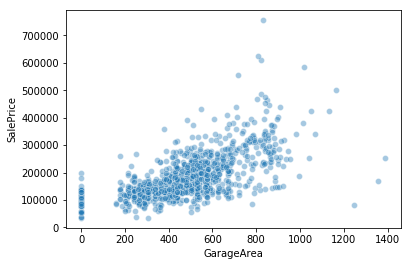

In [14]:
sb.scatterplot(df_test.GarageArea, df_test.SalePrice, alpha=0.4)

* Looks somewhat heteroscedastic wrt Garage area and # of cars
* Interesting that four cars are less, maybe because they are far in the country
* Might be better to treat garage cars as a categorical variable
* Can divide area by # of cars to decorrelate

[Text(0, 0.5, 'Area per Car'), Text(0.5, 0, 'Cars')]

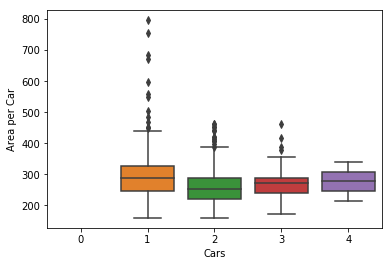

In [15]:
fig = sb.boxplot(df_test.GarageCars, df_test.GarageArea / df_test.GarageCars)
fig.set(ylabel='Area per Car', xlabel='Cars')

[Text(0.5, 0, 'Area per Car')]

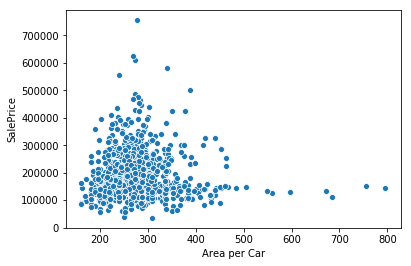

In [16]:
fig = sb.scatterplot(df_test.GarageArea / df_test.GarageCars, df_test.SalePrice)
fig.set(xlabel='Area per Car')

Area per car seems pretty consistent and not much affect on price.
__Should just use Number of cars__

#### Impact of area

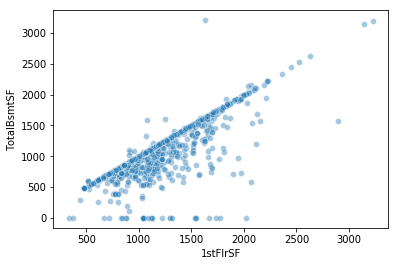

In [17]:
sb.scatterplot(df_test['1stFlrSF'], df_test.TotalBsmtSF, alpha=0.4)

Makes sense that most basements are the size of the 1st floor or smaller.
Some interesting outliers with much bigger basements

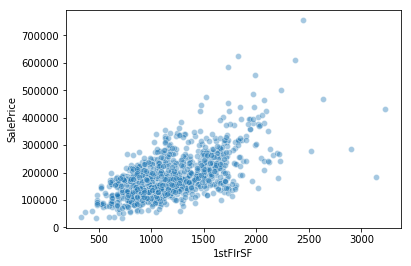

In [18]:
sb.scatterplot(df_test['1stFlrSF'], df_test.SalePrice, alpha=0.4)

Similar to garage area there is an obvious correlation with heteroscedastic error

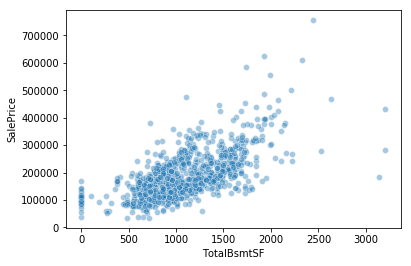

In [19]:
sb.scatterplot(df_test['TotalBsmtSF'], df_test.SalePrice, alpha=0.4)

Similar pattern but less useful as some have zero, try subtracting 1st floor

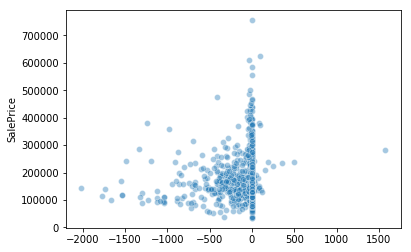

In [20]:
sb.scatterplot(df_test['TotalBsmtSF'] - df_test['1stFlrSF'], df_test.SalePrice, alpha=0.4)

Doesn't appear to be a pattern between the difference and the price

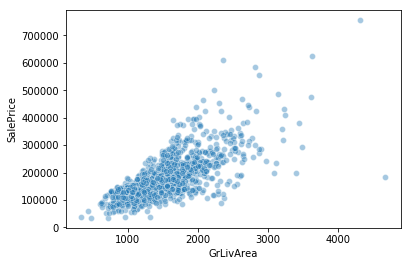

In [21]:
sb.scatterplot(df_test['GrLivArea'], df_test.SalePrice, alpha=0.4)

Similar to other area there is a strong correlation with heteroscedastic error. Would be interesting to look at the huge house that didn't sell for very much.

In [22]:
df_test.loc[df_test.GrLivArea > 4000].iloc[:,70:80]

,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
691,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal


Only difference that seems like it could cause such a big difference in price is the sale condition. Will look at Categoricals after.

#### Impact of year

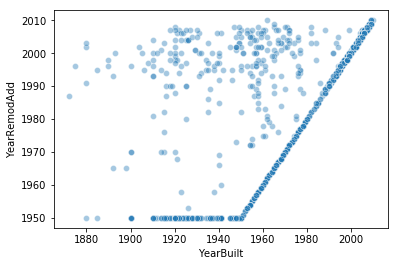

In [23]:
sb.scatterplot(df_test['YearBuilt'], df_test.YearRemodAdd, alpha=0.4)

Pretty interesting looking graph. Most houses have their remodelling date same as their original build year. However the remodel data only goes back to 1950 which needs to be accounted for. 

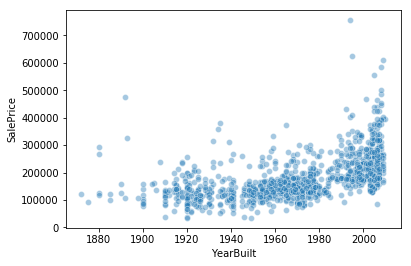

In [24]:
sb.scatterplot(df_test['YearBuilt'], df_test.SalePrice, alpha=0.4)

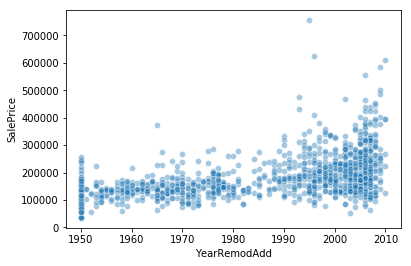

In [25]:
sb.scatterplot(df_test['YearRemodAdd'], df_test.SalePrice, alpha=0.4)

Not a very strong correlation with saleprice for either variable. Just a bit of an uptick for the max homes near 1990 plus. This would be hard for a linear model to pick up on but better for a decision tree.

[Text(0, 0.5, 'SalePrice'), Text(0.5, 0, 'Last work past 1990')]

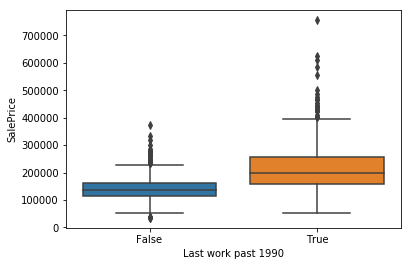

In [26]:
fig = sb.boxplot(df_test.YearRemodAdd > 1990, df_test.SalePrice)
fig.set(xlabel='Last work past 1990', ylabel='SalePrice')

Houses that were built or remodled since 1990 seem to have an increased sale price and a wider distribution. **This is a feature that should be included in the model.**

[Text(0, 0.5, 'SalePrice'), Text(0.5, 0, 'Has been remodled')]

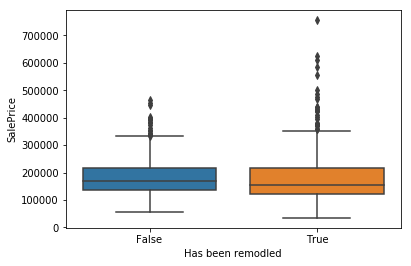

In [27]:
fig = sb.boxplot(df_test.YearRemodAdd > df_test.YearBuilt, df_test.SalePrice)
fig.set(xlabel='Has been remodled', ylabel='SalePrice')

Getting a remod seems not to increase the average saleprice but it does change the skewedness of the dist. **This could be a useful variable in a tree based model.**

#### Impact of lot

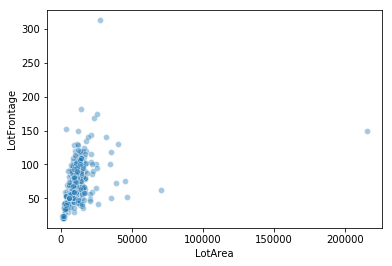

In [28]:
sb.scatterplot(df_test['LotArea'], df_test.LotFrontage, alpha=0.4)

Seem very highly correlated except with two highly leveraged outliers. Would have outsized impact on linear model.

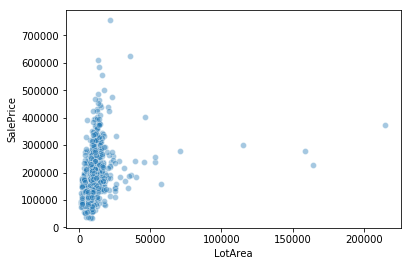

In [29]:
sb.scatterplot(df_test['LotArea'], df_test.SalePrice, alpha=0.4)

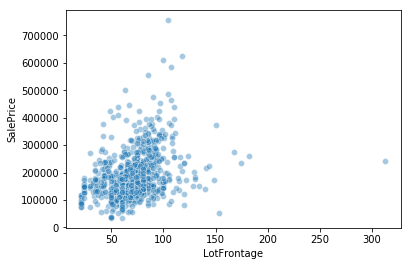

In [30]:
sb.scatterplot(df_test['LotFrontage'], df_test.SalePrice, alpha=0.4)

Neither of these look like great predictors and the highly leveraged points make it less useful.

#### Impact of sell date

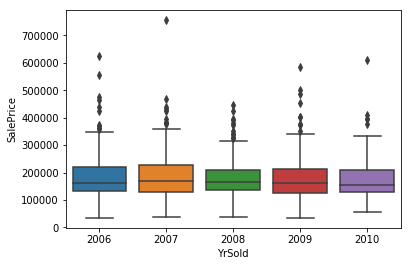

In [31]:
sb.boxplot(df_test['YrSold'], df_test.SalePrice)

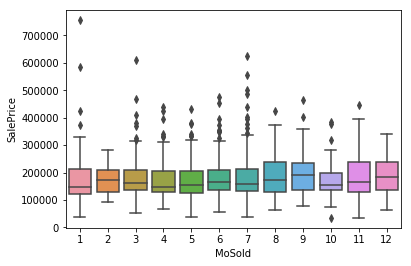

In [32]:
sb.boxplot(df_test['MoSold'], df_test.SalePrice)

Doesn't appear to be a strong effect from either Year or month sold. Should just ignore.

#### Impact of Quality

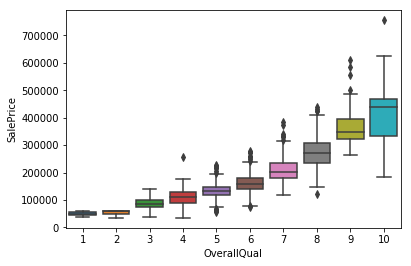

In [33]:
sb.boxplot(df_test['OverallQual'], df_test.SalePrice)

Definitely a strong corelation but with a wide range at 10. Not perfectly linear as difference seems to grow. Maybe should fit a quadratic model. 

#### Impact of Categoricals

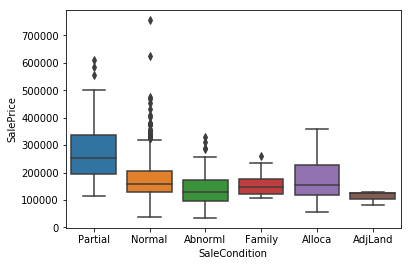

In [34]:
sb.boxplot(df_test['SaleCondition'], df_test.SalePrice)

Partial sale seems to have a boost and normal contains most of the skewness. The rest seem pretty similar and likely have a low number of samples.

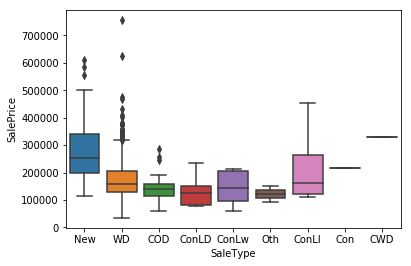

In [35]:
sb.boxplot(df_test['SaleType'], df_test.SalePrice)

New and WD seem to map to Partial and Normal from the sale condition. The other types seem scattered but no real pattern.

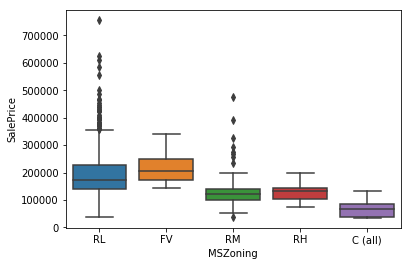

In [36]:
sb.boxplot(df_test['MSZoning'], df_test.SalePrice)

Definite differences in the skew between different groups. 

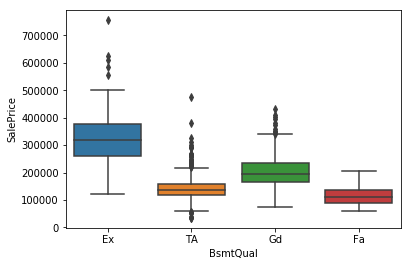

In [37]:
sb.boxplot(df_test['BsmtQual'], df_test.SalePrice)

The ordering is off but these could be enumerated and used as an ordinal feature.

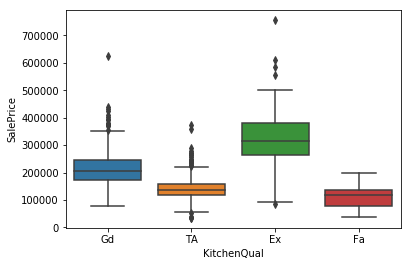

In [74]:
sb.boxplot(df_test['KitchenQual'], df_test.SalePrice)

The ordering is off but these could be enumerated and used as an ordinal feature.

### EDA Summary

* Lots of variables but most seem unnecessary
* Saleprice has a right skew
* Groups of correlated variables for which we can select one variable from each
* Heteroscedastic relationships that we can correct with log transformations
* Categorical variables that we can transform using ordinal variables. 

## First Pass of fitting model

In [10]:
df_dummy = df
df_dummy.MSSubClass = df_dummy.MSSubClass.astype(str)
df_dummy = pd.get_dummies(df)
X = df_dummy.drop(['SalePrice', 'Id'], axis=1).values
y = df_dummy.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [9]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

param_grid = [{'scaler': [MinMaxScaler(), None],
               'regressor': [RandomForestRegressor(n_estimators=100)],
               'regressor__min_samples_split': [5, 10],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [GradientBoostingRegressor()],
               'regressor__max_depth': [2, 3, 4, 5, 6],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1, 10]}
             ]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'scaler': [MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'regressor': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_l...  normalize=False, random_state=None, solver='auto', tol=0.001)], 'regressor__alpha': [0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_log_error', ve

In [10]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_features', 'param_regressor__max_depth',
            'param_scaler', 'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_features,param_regressor__max_depth,param_scaler,rank_test_score,rmsle
22,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,"MinMaxScaler(copy=True, feature_range=(0, 1))",1,0.130383
31,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,None,2,0.130594
28,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,"MinMaxScaler(copy=True, feature_range=(0, 1))",3,0.131099
29,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,4,None,4,0.131350
23,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,3,None,5,0.131426
30,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",6,0.131592
34,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,"MinMaxScaler(copy=True, feature_range=(0, 1))",7,0.132216
35,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,5,None,8,0.132650
41,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,6,None,9,0.132802
37,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,6,None,10,0.134132


In [11]:
grid.best_params_

{'regressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False),
 'regressor__max_depth': 3,
 'regressor__max_features': 0.3,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}

* Ridge regression is able to do alright despite the lack of feature engineering
* Gradient Boosting does well should try others like xgboost and catboost
* Should probably look at the data to reduce the feature space.
* Should also look at residuals to seem if fit is reasonable

In [12]:
pd.Series(grid.best_estimator_.named_steps.regressor.feature_importances_,
          index=df_dummy.drop(['SalePrice', 'Id'], axis=1).columns.values).sort_values()[::-1]


OverallQual             0.308631
GrLivArea               0.199965
TotalBsmtSF             0.064417
GarageArea              0.063460
GarageCars              0.062229
1stFlrSF                0.034619
BsmtFinSF1              0.029123
LotArea                 0.022668
YearBuilt               0.020995
MasVnrArea              0.018706
TotRmsAbvGrd            0.016680
BsmtQual_Ex             0.016182
YearRemodAdd            0.013141
Fireplaces              0.010169
FullBath                0.008917
BsmtQual_Gd             0.008237
OpenPorchSF             0.008188
GarageYrBlt             0.006625
2ndFlrSF                0.006340
KitchenQual_TA          0.005804
OverallCond             0.005799
ExterQual_TA            0.004914
KitchenQual_Ex          0.004584
WoodDeckSF              0.004316
MSSubClass_60           0.003802
CentralAir_Y            0.003531
CentralAir_N            0.003017
GarageType_Attchd       0.002979
Neighborhood_Crawfor    0.002840
BsmtExposure_Gd         0.002778
          

In [13]:
np.sqrt(-grid.score(X_val, y_val))

0.12471314302112191

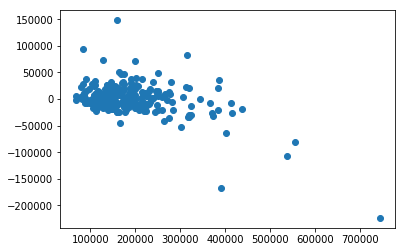

In [14]:
plt.scatter(y_val, grid.predict(X_val) - y_val)

[]

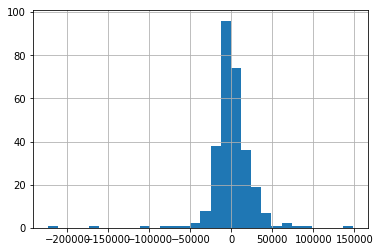

In [15]:
pd.Series(grid.predict(X_val) - y_val).hist(bins=30).plot()

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

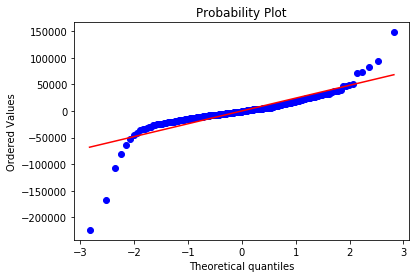

In [16]:
from scipy.stats import probplot
probplot(grid.predict(X_val) - y_val, plot=plt)

Residuals do not look normal. Pretty extreme values at either end.

## Second Pass

Only look at gradient boosting models without scaling. Use model based feature selection.

In [17]:
pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100))),
    ('regressor', GradientBoostingRegressor())
])

param_grid = { 'feature_selection': [SelectFromModel(RandomForestRegressor(n_estimators=100), threshold=0.0001),
                                     None],
               'regressor': [GradientBoostingRegressor(max_features=0.3),
                             XGBRegressor(),
                             CatBoostRegressor()],
               'regressor__max_depth': [4, 5, 6, 7, 8],
              }
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_log_error', return_train_score=False, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 192161.4575641	total: 67ms	remaining: 1m 6s
1:	learn: 187317.4642917	total: 80.6ms	remaining: 40.2s
2:	learn: 182537.9928070	total: 93.5ms	remaining: 31.1s
3:	learn: 177729.0055368	total: 106ms	remaining: 26.4s
4:	learn: 173163.9080325	total: 121ms	remaining: 24.2s
5:	learn: 168823.8284446	total: 134ms	remaining: 22.2s
6:	learn: 164514.7918531	total: 148ms	remaining: 20.9s
7:	learn: 160203.0403336	total: 161ms	remaining: 19.9s
8:	learn: 156150.1204491	total: 174ms	remaining: 19.1s
9:	learn: 152092.4650704	total: 187ms	remaining: 18.5s
10:	learn: 148146.2416439	total: 200ms	remaining: 17.9s
11:	learn: 144464.4738036	total: 212ms	remaining: 17.5s
12:	learn: 140899.9252965	total: 226ms	remaining: 17.2s
13:	learn: 137368.9080085	total: 239ms	remaining: 16.8s
14:	learn: 133938.6919362	total: 251ms	remaining: 16.5s
15:	learn: 130695.5084986	total: 263ms	remaining: 16.2s
16:	learn: 127528.1814729	total: 277ms	remaining: 16s
17:	learn: 124339.5341939	total: 289ms	remaining: 15.8s
18:

157:	learn: 25473.9997478	total: 2.13s	remaining: 11.3s
158:	learn: 25428.6338198	total: 2.14s	remaining: 11.3s
159:	learn: 25351.5785886	total: 2.15s	remaining: 11.3s
160:	learn: 25289.5624739	total: 2.17s	remaining: 11.3s
161:	learn: 25242.8207061	total: 2.18s	remaining: 11.3s
162:	learn: 25182.1173280	total: 2.19s	remaining: 11.3s
163:	learn: 25124.9698868	total: 2.2s	remaining: 11.2s
164:	learn: 25056.6331098	total: 2.21s	remaining: 11.2s
165:	learn: 24973.1579844	total: 2.23s	remaining: 11.2s
166:	learn: 24934.0072009	total: 2.24s	remaining: 11.2s
167:	learn: 24870.5859224	total: 2.25s	remaining: 11.2s
168:	learn: 24779.6980041	total: 2.26s	remaining: 11.1s
169:	learn: 24714.4134012	total: 2.28s	remaining: 11.1s
170:	learn: 24586.9068113	total: 2.29s	remaining: 11.1s
171:	learn: 24534.2719158	total: 2.31s	remaining: 11.1s
172:	learn: 24461.4342932	total: 2.32s	remaining: 11.1s
173:	learn: 24415.2615192	total: 2.34s	remaining: 11.1s
174:	learn: 24375.9488680	total: 2.35s	remaining:

305:	learn: 19523.2104630	total: 3.97s	remaining: 9s
306:	learn: 19493.8967260	total: 3.98s	remaining: 8.99s
307:	learn: 19445.6721155	total: 3.99s	remaining: 8.97s
308:	learn: 19430.7758522	total: 4.01s	remaining: 8.96s
309:	learn: 19403.6931938	total: 4.02s	remaining: 8.94s
310:	learn: 19373.8755729	total: 4.03s	remaining: 8.93s
311:	learn: 19360.6094395	total: 4.04s	remaining: 8.91s
312:	learn: 19354.0329264	total: 4.05s	remaining: 8.9s
313:	learn: 19342.9915733	total: 4.07s	remaining: 8.88s
314:	learn: 19331.1506625	total: 4.08s	remaining: 8.87s
315:	learn: 19304.2444128	total: 4.09s	remaining: 8.86s
316:	learn: 19293.6818225	total: 4.1s	remaining: 8.84s
317:	learn: 19288.0142397	total: 4.12s	remaining: 8.83s
318:	learn: 19253.2129769	total: 4.13s	remaining: 8.82s
319:	learn: 19231.6339909	total: 4.14s	remaining: 8.8s
320:	learn: 19207.3871876	total: 4.15s	remaining: 8.79s
321:	learn: 19170.9671836	total: 4.17s	remaining: 8.78s
322:	learn: 19141.1834627	total: 4.18s	remaining: 8.77

464:	learn: 17257.2392052	total: 5.99s	remaining: 6.89s
465:	learn: 17255.9362348	total: 6s	remaining: 6.88s
466:	learn: 17232.6163160	total: 6.01s	remaining: 6.86s
467:	learn: 17231.4398536	total: 6.02s	remaining: 6.84s
468:	learn: 17225.0620215	total: 6.03s	remaining: 6.83s
469:	learn: 17222.0156954	total: 6.04s	remaining: 6.82s
470:	learn: 17207.7731764	total: 6.06s	remaining: 6.81s
471:	learn: 17206.4893657	total: 6.07s	remaining: 6.79s
472:	learn: 17203.8892526	total: 6.08s	remaining: 6.78s
473:	learn: 17189.7287400	total: 6.1s	remaining: 6.77s
474:	learn: 17187.7141384	total: 6.11s	remaining: 6.75s
475:	learn: 17184.7873647	total: 6.12s	remaining: 6.74s
476:	learn: 17174.8571645	total: 6.13s	remaining: 6.73s
477:	learn: 17165.2992730	total: 6.15s	remaining: 6.71s
478:	learn: 17163.0276298	total: 6.16s	remaining: 6.7s
479:	learn: 17161.3387321	total: 6.17s	remaining: 6.68s
480:	learn: 17146.0132639	total: 6.18s	remaining: 6.67s
481:	learn: 17135.7000895	total: 6.2s	remaining: 6.66

625:	learn: 16547.2915094	total: 8.03s	remaining: 4.79s
626:	learn: 16545.8309305	total: 8.04s	remaining: 4.78s
627:	learn: 16545.1159249	total: 8.05s	remaining: 4.77s
628:	learn: 16539.7515685	total: 8.06s	remaining: 4.75s
629:	learn: 16537.9643647	total: 8.08s	remaining: 4.74s
630:	learn: 16529.9995330	total: 8.09s	remaining: 4.73s
631:	learn: 16525.9247874	total: 8.1s	remaining: 4.72s
632:	learn: 16521.2858836	total: 8.12s	remaining: 4.71s
633:	learn: 16520.9216820	total: 8.13s	remaining: 4.69s
634:	learn: 16520.2724994	total: 8.14s	remaining: 4.68s
635:	learn: 16519.2354396	total: 8.15s	remaining: 4.67s
636:	learn: 16518.4976045	total: 8.16s	remaining: 4.65s
637:	learn: 16511.6912293	total: 8.18s	remaining: 4.64s
638:	learn: 16508.8087962	total: 8.19s	remaining: 4.63s
639:	learn: 16508.3189453	total: 8.2s	remaining: 4.61s
640:	learn: 16505.8305081	total: 8.22s	remaining: 4.6s
641:	learn: 16505.4095204	total: 8.23s	remaining: 4.59s
642:	learn: 16501.6177673	total: 8.24s	remaining: 4

783:	learn: 16109.2166785	total: 10s	remaining: 2.76s
784:	learn: 16105.6184195	total: 10s	remaining: 2.75s
785:	learn: 16102.9970313	total: 10.1s	remaining: 2.74s
786:	learn: 16102.6227434	total: 10.1s	remaining: 2.72s
787:	learn: 16101.7718831	total: 10.1s	remaining: 2.71s
788:	learn: 16101.4863959	total: 10.1s	remaining: 2.7s
789:	learn: 16101.2783330	total: 10.1s	remaining: 2.68s
790:	learn: 16100.2083538	total: 10.1s	remaining: 2.67s
791:	learn: 16100.0556705	total: 10.1s	remaining: 2.66s
792:	learn: 16099.2230543	total: 10.1s	remaining: 2.65s
793:	learn: 16098.7571772	total: 10.1s	remaining: 2.63s
794:	learn: 16098.3449687	total: 10.2s	remaining: 2.62s
795:	learn: 16098.0338712	total: 10.2s	remaining: 2.61s
796:	learn: 16097.8282010	total: 10.2s	remaining: 2.59s
797:	learn: 16095.5890625	total: 10.2s	remaining: 2.58s
798:	learn: 16095.3332883	total: 10.2s	remaining: 2.57s
799:	learn: 16094.8794204	total: 10.2s	remaining: 2.56s
800:	learn: 16094.4303551	total: 10.2s	remaining: 2.5

942:	learn: 15797.5774455	total: 12s	remaining: 726ms
943:	learn: 15796.2891293	total: 12s	remaining: 714ms
944:	learn: 15795.9281746	total: 12s	remaining: 701ms
945:	learn: 15795.6065830	total: 12.1s	remaining: 688ms
946:	learn: 15780.3745442	total: 12.1s	remaining: 675ms
947:	learn: 15780.2959493	total: 12.1s	remaining: 663ms
948:	learn: 15779.1734344	total: 12.1s	remaining: 650ms
949:	learn: 15779.0450985	total: 12.1s	remaining: 637ms
950:	learn: 15774.2169060	total: 12.1s	remaining: 624ms
951:	learn: 15773.8785249	total: 12.1s	remaining: 612ms
952:	learn: 15773.6240316	total: 12.1s	remaining: 599ms
953:	learn: 15771.7874631	total: 12.2s	remaining: 586ms
954:	learn: 15764.3063287	total: 12.2s	remaining: 573ms
955:	learn: 15759.9011670	total: 12.2s	remaining: 561ms
956:	learn: 15751.6773847	total: 12.2s	remaining: 548ms
957:	learn: 15750.9239466	total: 12.2s	remaining: 535ms
958:	learn: 15750.6681022	total: 12.2s	remaining: 522ms
959:	learn: 15746.3168793	total: 12.2s	remaining: 510m

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('impute', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('feature_selection', SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
         ...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'feature_selection': [SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
 ...catboost.core.CatBoostRegressor object at 0x7fe9f386b2e8>], 'regressor__max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=T

In [18]:
grid.best_params_

{'feature_selection': None,
 'regressor': <catboost.core.CatBoostRegressor at 0x7fe9f386b2e8>,
 'regressor__max_depth': 7}

In [19]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_depth', 'param_feature_selection',
            'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_depth,param_feature_selection,rank_test_score,rmsle
28,<catboost.core.CatBoostRegressor object at 0x7...,7,None,1,0.128189
15,"GradientBoostingRegressor(alpha=0.9, criterion...",4,None,2,0.129908
13,<catboost.core.CatBoostRegressor object at 0x7...,7,SelectFromModel(estimator=RandomForestRegresso...,3,0.130004
27,<catboost.core.CatBoostRegressor object at 0x7...,6,None,4,0.130318
12,<catboost.core.CatBoostRegressor object at 0x7...,6,SelectFromModel(estimator=RandomForestRegresso...,5,0.131044
29,<catboost.core.CatBoostRegressor object at 0x7...,8,None,6,0.131506
10,<catboost.core.CatBoostRegressor object at 0x7...,4,SelectFromModel(estimator=RandomForestRegresso...,7,0.131868
11,<catboost.core.CatBoostRegressor object at 0x7...,5,SelectFromModel(estimator=RandomForestRegresso...,8,0.132154
26,<catboost.core.CatBoostRegressor object at 0x7...,5,None,9,0.132653
20,"XGBRegressor(base_score=0.5, booster='gbtree',...",4,None,10,0.132904


In [20]:
np.sqrt(-grid.score(X_val, y_val))

0.1315463869344899

* Cat boost seems to do well but might do even better if I hadn't one hot encoded the data.
* Feature selection seemed to help a little with a low threshold

## Pass 3: Catboost

In [12]:
df[df.select_dtypes(include=['object']).columns] =  df.select_dtypes(include=['object']).fillna('None')
X = df.drop(['SalePrice', 'Id'], axis=1).values
y = df.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [13]:
# subract one to account for id as first col
cat_cols = [df.columns.get_loc(x) - 1 for x in df.select_dtypes(include=['object']).columns.values]

In [24]:
from catboost import Pool, cv

train_pool = Pool(X_train, y_train, cat_features=cat_cols)
test_pool = Pool(X_val, cat_features=cat_cols) 
for d in range(4,8):
    param_grid = { 
                   'depth': d,
                   'loss_function': 'RMSE',
                  }

    cv_results = cv(train_pool, param_grid, iterations=1000, fold_count=5, logging_level='Silent')
    print(d, cv_results['test-RMSE-mean'].min())

4 29014.547213254886
5 28788.754434451857
6 28651.90339042642
7 27996.1481433496


In [19]:
cv_results

,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,191881.667246,4466.364378,191951.531030,1107.884584
1,186845.834719,4461.135623,186927.681515,1149.500742


In [43]:
model = CatBoostRegressor(iterations=500, depth=4, loss_function='RMSE')
model.fit(train_pool, eval_set=test_pool)

0:	learn: 191944.7200029	test: 5502.2642029	best: 5502.2642029 (0)	total: 9.91ms	remaining: 4.95s
1:	learn: 186894.6036263	test: 10646.1983613	best: 5502.2642029 (0)	total: 20.8ms	remaining: 5.17s
2:	learn: 181902.5076990	test: 15838.9273333	best: 5502.2642029 (0)	total: 32.9ms	remaining: 5.46s
3:	learn: 177092.1165441	test: 20886.6193490	best: 5502.2642029 (0)	total: 43.1ms	remaining: 5.34s
4:	learn: 172372.5869496	test: 25698.9275295	best: 5502.2642029 (0)	total: 54.1ms	remaining: 5.36s
5:	learn: 167855.5741189	test: 30401.2498870	best: 5502.2642029 (0)	total: 67.1ms	remaining: 5.53s
6:	learn: 163520.3042361	test: 34829.4483955	best: 5502.2642029 (0)	total: 77.3ms	remaining: 5.45s
7:	learn: 159192.1966124	test: 39234.7587563	best: 5502.2642029 (0)	total: 93.2ms	remaining: 5.73s
8:	learn: 155278.7918401	test: 43417.7735369	best: 5502.2642029 (0)	total: 102ms	remaining: 5.54s
9:	learn: 151326.7945421	test: 47425.7139216	best: 5502.2642029 (0)	total: 111ms	remaining: 5.44s
10:	learn: 14

86:	learn: 37322.0348412	test: 176516.9200617	best: 5502.2642029 (0)	total: 824ms	remaining: 3.91s
87:	learn: 37007.6632416	test: 176960.9915997	best: 5502.2642029 (0)	total: 836ms	remaining: 3.91s
88:	learn: 36679.0033988	test: 177456.6605780	best: 5502.2642029 (0)	total: 846ms	remaining: 3.91s
89:	learn: 36397.0944451	test: 177944.7508398	best: 5502.2642029 (0)	total: 858ms	remaining: 3.91s
90:	learn: 36120.5452796	test: 178395.0959057	best: 5502.2642029 (0)	total: 865ms	remaining: 3.88s
91:	learn: 35862.2452184	test: 178857.4100958	best: 5502.2642029 (0)	total: 876ms	remaining: 3.88s
92:	learn: 35546.2281438	test: 179288.9850517	best: 5502.2642029 (0)	total: 886ms	remaining: 3.88s
93:	learn: 35302.4486987	test: 179678.0393565	best: 5502.2642029 (0)	total: 892ms	remaining: 3.85s
94:	learn: 35057.3587786	test: 180071.0103176	best: 5502.2642029 (0)	total: 901ms	remaining: 3.84s
95:	learn: 34868.6565360	test: 180452.4971502	best: 5502.2642029 (0)	total: 911ms	remaining: 3.83s
96:	learn:

172:	learn: 26926.4747314	test: 193442.7230649	best: 5502.2642029 (0)	total: 1.64s	remaining: 3.1s
173:	learn: 26882.4021176	test: 193480.6183093	best: 5502.2642029 (0)	total: 1.65s	remaining: 3.09s
174:	learn: 26862.8052242	test: 193538.0846307	best: 5502.2642029 (0)	total: 1.65s	remaining: 3.07s
175:	learn: 26832.5490473	test: 193590.8100636	best: 5502.2642029 (0)	total: 1.66s	remaining: 3.06s
176:	learn: 26830.4976789	test: 193619.3616417	best: 5502.2642029 (0)	total: 1.67s	remaining: 3.05s
177:	learn: 26797.3825099	test: 193662.5896784	best: 5502.2642029 (0)	total: 1.68s	remaining: 3.04s
178:	learn: 26765.0046145	test: 193731.4711825	best: 5502.2642029 (0)	total: 1.69s	remaining: 3.04s
179:	learn: 26737.5687308	test: 193776.0523255	best: 5502.2642029 (0)	total: 1.7s	remaining: 3.03s
180:	learn: 26712.4408233	test: 193829.4788055	best: 5502.2642029 (0)	total: 1.71s	remaining: 3.02s
181:	learn: 26705.9890692	test: 193866.6065535	best: 5502.2642029 (0)	total: 1.72s	remaining: 3.01s
18

266:	learn: 24483.6505840	test: 195550.4698778	best: 5502.2642029 (0)	total: 2.45s	remaining: 2.14s
267:	learn: 24481.2487653	test: 195559.4900438	best: 5502.2642029 (0)	total: 2.46s	remaining: 2.13s
268:	learn: 24470.7199375	test: 195598.2936590	best: 5502.2642029 (0)	total: 2.47s	remaining: 2.12s
269:	learn: 24414.7541402	test: 195600.3217614	best: 5502.2642029 (0)	total: 2.48s	remaining: 2.11s
270:	learn: 24396.5148286	test: 195619.2221160	best: 5502.2642029 (0)	total: 2.49s	remaining: 2.11s
271:	learn: 24381.8788288	test: 195605.2658855	best: 5502.2642029 (0)	total: 2.5s	remaining: 2.1s
272:	learn: 24380.5645457	test: 195613.5914217	best: 5502.2642029 (0)	total: 2.51s	remaining: 2.09s
273:	learn: 24369.6244513	test: 195604.0718370	best: 5502.2642029 (0)	total: 2.52s	remaining: 2.08s
274:	learn: 24367.6148969	test: 195606.6980354	best: 5502.2642029 (0)	total: 2.53s	remaining: 2.07s
275:	learn: 24367.1907659	test: 195612.0685067	best: 5502.2642029 (0)	total: 2.53s	remaining: 2.06s
27

350:	learn: 22936.2301472	test: 195658.2647616	best: 5502.2642029 (0)	total: 3.26s	remaining: 1.38s
351:	learn: 22935.2323010	test: 195658.2580047	best: 5502.2642029 (0)	total: 3.27s	remaining: 1.37s
352:	learn: 22929.4302835	test: 195659.2506162	best: 5502.2642029 (0)	total: 3.28s	remaining: 1.37s
353:	learn: 22919.6830579	test: 195667.2978167	best: 5502.2642029 (0)	total: 3.29s	remaining: 1.36s
354:	learn: 22901.9213569	test: 195668.2866223	best: 5502.2642029 (0)	total: 3.3s	remaining: 1.35s
355:	learn: 22866.7353227	test: 195666.9067736	best: 5502.2642029 (0)	total: 3.31s	remaining: 1.34s
356:	learn: 22864.4171367	test: 195665.0237172	best: 5502.2642029 (0)	total: 3.32s	remaining: 1.33s
357:	learn: 22855.2674870	test: 195676.3237835	best: 5502.2642029 (0)	total: 3.33s	remaining: 1.32s
358:	learn: 22834.4642200	test: 195631.9173309	best: 5502.2642029 (0)	total: 3.34s	remaining: 1.31s
359:	learn: 22833.0141779	test: 195637.6906352	best: 5502.2642029 (0)	total: 3.35s	remaining: 1.3s
36

453:	learn: 21722.9850565	test: 196013.0343186	best: 5502.2642029 (0)	total: 4.27s	remaining: 433ms
454:	learn: 21697.4850585	test: 196011.2726682	best: 5502.2642029 (0)	total: 4.28s	remaining: 423ms
455:	learn: 21660.5177320	test: 196016.7221278	best: 5502.2642029 (0)	total: 4.29s	remaining: 414ms
456:	learn: 21658.4287382	test: 196019.5049158	best: 5502.2642029 (0)	total: 4.3s	remaining: 404ms
457:	learn: 21641.6048156	test: 196028.1088301	best: 5502.2642029 (0)	total: 4.31s	remaining: 395ms
458:	learn: 21639.1783525	test: 196030.9257127	best: 5502.2642029 (0)	total: 4.32s	remaining: 386ms
459:	learn: 21636.5837623	test: 196027.9957504	best: 5502.2642029 (0)	total: 4.33s	remaining: 377ms
460:	learn: 21632.7046656	test: 196032.8446317	best: 5502.2642029 (0)	total: 4.34s	remaining: 368ms
461:	learn: 21614.5049606	test: 196045.5174351	best: 5502.2642029 (0)	total: 4.35s	remaining: 358ms
462:	learn: 21607.0997317	test: 196054.3837633	best: 5502.2642029 (0)	total: 4.36s	remaining: 349ms
4

In [44]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(model.predict(X_val), y_val)

0.020240679680221113

In [45]:
test = pd.read_csv('data/test.csv')
test.MSSubClass = test.MSSubClass.astype(str)
test[test.select_dtypes(include=['object']).columns] =  test.select_dtypes(include=['object']).fillna('None')
X_test = test.drop('Id', axis=1).loc[:, df.drop(['SalePrice', 'Id'], axis=1).columns].values

y_pred = model.predict(X_test)
pd.DataFrame({'SalePrice': y_pred}, index=pd.read_csv('data/test.csv').Id).to_csv('output/pred.csv')

## Prepare submission

In [21]:
test = pd.read_csv('data/test.csv')
test.MSSubClass = test.MSSubClass.astype(str)
test = pd.get_dummies(test)
X_test = test.drop('Id', axis=1).loc[:, df_dummy.drop(['SalePrice', 'Id'], axis=1).columns].values

pipe = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('regressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=4, max_features=0.3,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_iter_no_change=None, presort='auto',
              random_state=None, subsample=1.0, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False))
])
pipe.fit(X,y)
y_pred = pipe.predict(X_test)

/home/will/kaggle/kaggle/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [22]:
pd.DataFrame({'SalePrice': y_pred}, index=pd.read_csv('data/test.csv').Id).to_csv('output/pred.csv')

## Fourth Pass (Using EDA)

In [102]:
mod = df.loc[:, ['OverallQual', 'KitchenQual', 'BsmtQual', 'YearRemodAdd', 
                          'GrLivArea', 'GarageCars', 'SalePrice']]
mod['KitchenQual'] = (mod.KitchenQual.astype("category", categories=['Fa', 'TA', 'Gd', 'Ex']).cat.codes)
mod['BsmtQual'] = mod.BsmtQual.astype("category", categories=['Fa', 'TA', 'Gd', 'Ex']).cat.codes
mod['RemodAfter90'] = (mod.YearRemodAdd > 1990).astype('int')
mod['GrLivArea']  = np.log(mod.GrLivArea)
mod['SalePrice']  = np.log(mod.SalePrice)
mod = mod.drop('YearRemodAdd', axis=1)

/home/will/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/will/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


In [105]:
X = mod.drop(['SalePrice'], axis=1).values
y = mod.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [123]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])
param_grid =[{'scaler': [MinMaxScaler(), None],
               'regressor': [GradientBoostingRegressor()],
               'regressor__max_depth': [2, 3, 4, 5, 6],
               'regressor__max_features': ['sqrt', 'log2', 0.3],
              },
              {'scaler': [MinMaxScaler(), None],
               'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1, 10]}]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=False)
grid.fit(X_train, y_train)

{'mean_fit_time': array([0.02442303, 0.02215691, 0.02245088, 0.02188749, 0.02033515,
        0.01998792, 0.02617235, 0.02561908, 0.02627916, 0.02630391,
        0.02480555, 0.02444944, 0.03172588, 0.03162646, 0.03230529,
        0.03195848, 0.02652402, 0.02613239, 0.03575292, 0.0368516 ,
        0.03820925, 0.03683853, 0.03107042, 0.03025074, 0.04385352,
        0.05192828, 0.04866338, 0.04436235, 0.03703632, 0.0376945 ,
        0.00103512, 0.0008255 , 0.00090852, 0.00064845, 0.0008544 ,
        0.00061936]),
 'std_fit_time': array([8.63346005e-04, 4.61213440e-04, 5.35367173e-04, 8.74517788e-05,
        2.18726478e-04, 1.22080985e-04, 4.66796238e-04, 1.41720817e-04,
        7.32541158e-04, 1.45534622e-04, 7.18369968e-04, 2.31732880e-04,
        8.46784995e-04, 1.50131781e-03, 5.73417181e-04, 5.15750928e-04,
        1.95810693e-04, 1.63525698e-04, 3.66797530e-04, 1.42979475e-03,
        3.08188248e-04, 9.54409995e-04, 4.25132549e-04, 3.31196186e-04,
        1.17025757e-03, 3.93819325e-0

In [124]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.loc[:, ['param_regressor', 'param_regressor__max_features', 'param_regressor__max_depth',
            'param_scaler', 'rank_test_score', 'rmsle']].sort_values('rank_test_score')

,param_regressor,param_regressor__max_features,param_regressor__max_depth,param_scaler,rank_test_score,rmsle
30,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",1,0.174850
33,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",NaN,NaN,None,2,0.174851
31,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",NaN,NaN,None,3,0.174855
32,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",4,0.175033
35,"Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...",NaN,NaN,None,5,0.175336
2,([DecisionTreeRegressor(criterion='friedman_ms...,log2,2,"MinMaxScaler(copy=True, feature_range=(0, 1))",6,0.177085
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,2,"MinMaxScaler(copy=True, feature_range=(0, 1))",7,0.177210
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.3,2,None,8,0.177298
3,([DecisionTreeRegressor(criterion='friedman_ms...,log2,2,None,9,0.177817
0,([DecisionTreeRegressor(criterion='friedman_ms...,sqrt,2,"MinMaxScaler(copy=True, feature_range=(0, 1))",10,0.178201


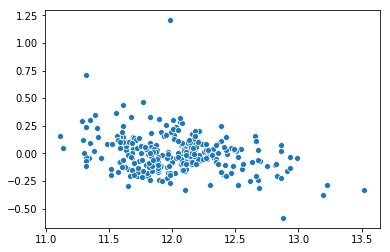

In [121]:
sb.scatterplot(y_val, grid.predict(X_val) -y_val)

Model performs worse on CV than best submission so won't submit.


## Fifth Pass

Use combination of feature engineering, all data, and more advanced modelling techniques.

In [42]:
mod = df.copy()

In [43]:
mod['KitchenQual'] = (mod.KitchenQual.astype("category", categories=['Fa', 'TA', 'Gd', 'Ex']).cat.codes)
mod['BsmtQual'] = mod.BsmtQual.astype("category", categories=['Fa', 'TA', 'Gd', 'Ex']).cat.codes
mod['RemodAfter90'] = (mod.YearRemodAdd > 1990).astype('int')
mod['GrLivArea']  = np.log(mod.GrLivArea)
mod['SalePrice']  = np.log(mod.SalePrice)
mod.MSSubClass = mod.MSSubClass.astype(str)

# imputation ideas taken from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
mod['LotFrontage'] = mod.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
mod['GarageYrBlt'] = mod.GarageYrBlt.fillna(0)
mod['MasVnrArea'] = mod.MasVnrArea.fillna(0)
mod['Functional'] = mod.Functional.fillna('Typ')

# Ref: https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
# Highlights that should remove these ouliers
mod = mod.loc[mod.GrLivArea < 4000]

mod = pd.get_dummies(mod)

/home/will/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
/home/will/kaggle/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [45]:
X = mod.drop(['SalePrice'], axis=1).values
y = mod.SalePrice.values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

In [63]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', Ridge())
])

param_grid = [
              {'scaler': [MinMaxScaler(), RobustScaler(), None],
               'regressor': [GradientBoostingRegressor(loss='huber')],
               'regressor__max_depth': [2, 3, 4],
               'regressor__n_estimators': [100, 500, 1000],
               'regressor__max_features': ['sqrt', 0.3],
              },
              {'scaler': [MinMaxScaler(), RobustScaler(), None],
               'regressor': [Ridge(), Lasso()],
               'regressor__alpha': [0.0005, 0.001, 0.0001]}
             ]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error',
                    return_train_score=False, n_jobs=-1)


In [64]:

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regressor', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'scaler': [MinMaxScaler(copy=True, feature_range=(0, 1)), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), None], 'regressor': [GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, l...   selection='cyclic', tol=0.0001, warm_start=False)], 'regressor__alpha': [0.0005, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='neg_mean_squared_error', verbose=0)

In [65]:
grid.best_params_

{'regressor': Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'regressor__alpha': 0.0005,
 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
        with_scaling=True)}

In [68]:
res = pd.DataFrame(grid.cv_results_)
res['rmsle'] = np.sqrt(-res.mean_test_score)
res.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__max_depth,param_regressor__max_features,param_regressor__n_estimators,param_scaler,param_regressor__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,rmsle
64,0.267711,0.019849,0.009207,0.004491,"Lasso(alpha=0.0005, copy_X=True, fit_intercept...",NaN,NaN,NaN,"RobustScaler(copy=True, quantile_range=(25.0, ...",0.0005,"{'regressor': Lasso(alpha=0.0005, copy_X=True,...",-0.009416,-0.025932,-0.016434,-0.010708,-0.009625,-0.014430,0.006302,1,0.120126
63,0.119001,0.029668,0.006303,0.005325,"Lasso(alpha=0.0005, copy_X=True, fit_intercept...",NaN,NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.0005,"{'regressor': Lasso(alpha=0.0005, copy_X=True,...",-0.009339,-0.024160,-0.016893,-0.012064,-0.009732,-0.014444,0.005559,2,0.120181
65,0.277259,0.048143,0.005532,0.003947,"Lasso(alpha=0.0005, copy_X=True, fit_intercept...",NaN,NaN,NaN,None,0.0005,"{'regressor': Lasso(alpha=0.0005, copy_X=True,...",-0.009350,-0.029105,-0.017083,-0.010211,-0.009338,-0.015026,0.007622,3,0.122581
66,0.080214,0.020190,0.012714,0.007715,"Lasso(alpha=0.0005, copy_X=True, fit_intercept...",NaN,NaN,NaN,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.001,"{'regressor': Lasso(alpha=0.0005, copy_X=True,...",-0.009382,-0.024111,-0.018448,-0.012767,-0.010427,-0.015033,0.005523,4,0.122610
15,4.362333,0.177504,0.005427,0.000057,"GradientBoostingRegressor(alpha=0.9, criterion...",2,0.3,1000,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,{'regressor': GradientBoostingRegressor(alpha=...,-0.009358,-0.025910,-0.017959,-0.011225,-0.010730,-0.015043,0.006201,5,0.122652
3,1.265381,0.067407,0.003290,0.000083,"GradientBoostingRegressor(alpha=0.9, criterion...",2,sqrt,500,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,{'regressor': GradientBoostingRegressor(alpha=...,-0.009962,-0.024282,-0.019501,-0.011034,-0.010557,-0.015074,0.005786,6,0.122778
67,0.241826,0.014150,0.002702,0.003238,"Lasso(alpha=0.0005, copy_X=True, fit_intercept...",NaN,NaN,NaN,"RobustScaler(copy=True, quantile_range=(25.0, ...",0.001,"{'regressor': Lasso(alpha=0.0005, copy_X=True,...",-0.009547,-0.026706,-0.017694,-0.011060,-0.010493,-0.015107,0.006481,7,0.122912
13,2.310744,0.108099,0.003447,0.000049,"GradientBoostingRegressor(alpha=0.9, criterion...",2,0.3,500,"RobustScaler(copy=True, quantile_range=(25.0, ...",NaN,{'regressor': GradientBoostingRegressor(alpha=...,-0.009141,-0.024638,-0.018670,-0.011857,-0.011524,-0.015172,0.005704,8,0.123174
6,2.369780,0.017894,0.005431,0.000220,"GradientBoostingRegressor(alpha=0.9, criterion...",2,sqrt,1000,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,{'regressor': GradientBoostingRegressor(alpha=...,-0.010340,-0.024796,-0.018391,-0.012541,-0.009854,-0.015191,0.005686,9,0.123252
12,2.147267,0.038015,0.003358,0.000068,"GradientBoostingRegressor(alpha=0.9, criterion...",2,0.3,500,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,{'regressor': GradientBoostingRegressor(alpha=...,-0.010526,-0.024607,-0.018809,-0.010589,-0.011645,-0.015242,0.005610,10,0.123459


In [70]:
np.sqrt(-grid.score(X_val, y_val))

0.17722173736142816